# <a href="https://miptstats.github.io/courses/ad_mipt.html">Phystech@DataScience</a>
## Домашнее задание 11

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_pds_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков можно использовать без ограничений.**

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash;  20 баллов
* Задача 2 &mdash;  40 баллов

<b><font color="orange">Cложная часть</font></b> (необходимо на "отл"):
* Задача 3 &mdash;  60 баллов
* Задача 4 &mdash;  30 баллов





-----

In [1]:
# Bot check

# HW_ID: phds_hw11
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style='whitegrid', font_scale=1.3, palette='Set2')

При решении задания используйте `sklearn`. Пропишите сюда необходимые импорты

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sps
import os
import graphviz
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split, GridSearchCV

# возможно придется что-то добавить)

## <b><font color="blue">Легкая часть</font></b>

## Задача 1

Перед обучением линейной регрессии вы могли совершать некоторые преобразования над признаками. Какие преобразования стоит совершить перед обучением решающего дерева?

В частности, ответьте и поясните свой ответ на вопрос, имеет ли смысл примененять следующие преобразования:
* монотонные функции от одного признака;
* немонотонные функции от одного признака;
* линейные функции от нескольких признаков;
* нелинейные функции от нескольких признаков;
* стандартизация признаков;
* преобразования категориальных признаков.

Например, вместо/дополнительно с признаком $x_j$ рассматривать признак $f(x_j)$, для указанных выше типов функций.

Перед обучением линейной регрессии мы стандартизировали данные, т.к. у них может быть разная размерность, а регрессия чувствительна к масштабу. Для дерева это не нужно делать, т.к. для него не важен масштаб данных. Поэтому стандартизация признаков не нужна.

Преобразовывать с помощью монотонных функций от одного признака не имеет смысла, т.к. деревья самостоятельно могут учитывать эту зависимость. Аналогично для немонотонных функций.

Деревья могут адаптироваться к линейным и нелинейным зависимостям между признаками и целевой переменной, как это было показано на семинаре. Поэтому такие преобразования не имеют смысла.

Преобразовывать категориальные признаки имеет смысл, если они находятся в "неподходящем формате". Возможно, это необходимо, если один и тот же объект имеет несколько слов для описания(как пример, "Ленинград" и "Санкт-Петербург"). В остальном дерево может напрямую работать с категориальными признаками, без необходимости перевода их в численный формат.

## Задача 2

### 1. Загрузка и предобработка данных.

### *Профиль биология*

В этом [наборе данных](https://www.kaggle.com/datasets/arezaei81/heartcsv) содержится различная информация о пациентах, включая возраст, пол, артериальное давление, уровень холестерина, электрокардиографические характеристики (ЭКГ) и многое другое. Целевой характеристикой является `target` - наличие у пациента сердечного заболевания.



Информация о наборе данных:

1. **age**: Возраст пациента.
2. **sex**: Пол пациента (0: женский, 1: мужской).
3. **cp**: Тип боли в груди.
4. **trestbps**: Артериальное давление в состоянии покоя.
5. **chol**: уровень холестерина в сыворотке крови.
6. **fbs**: Быстрый сахар крови > 120 мг/дл.
7. **restecg**: Результаты электрокардиографии в состоянии покоя.
8. **thalach**: Максимальная достигнутая частота сердечных сокращений.
9. **exang**: Стенокардия, вызванная физической нагрузкой.
10. **oldpeak**: Депрессия ST, вызванная физической нагрузкой по сравнению с покоем.



In [4]:
heart = pd.read_csv("C:/Users/админ/Desktop/МатСтаты/датасеты/heart.csv")

In [5]:
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


### 2. Обучение модели


Создайте массив признаков и массив таргета.

In [6]:
X = heart.iloc[:, :13]
y = heart['target']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=777)

Обучите модель решающего дерева.

In [8]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Сделайте предсказание для тестовой выборки.

In [9]:
y_pred = model.predict(X_test)

Создайте массив, показывающий успех или не успех модели (1 если модель угадала класс, 0 если не угадала).

In [10]:
guess = y_pred == y_test
guess = np.array([int(x) for x in guess])

Вы получили выборку из распределения $Bern(\theta)$. Постройте доверительный интервал для $\theta$.

c:\Anaconda\envs\laba\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Density'>

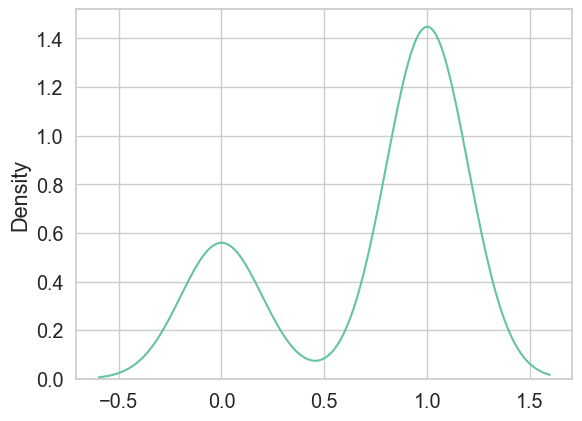

In [11]:
# построим гистограмму, чтобы была
sns.kdeplot(guess)

In [12]:
estimation = np.mean(guess)
sigma = estimation*(1- estimation)
alpha = 0.95
#c = sps.bernoulli.ppf()
z = sps.norm.ppf(1-alpha/2)
conf_int = round(estimation - z*(sigma/len(guess))**0.5, 4), round(estimation + z*(sigma/len(guess))**0.5, 4)
conf_int

(0.7177, 0.7249)

Повторите все шаги для случайного леса. Сравните полученные интервалы.

In [13]:
forest = RandomForestClassifier(random_state = 42)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [14]:
y_pred_f = forest.predict(X_test)

In [15]:
guess_f = y_pred_f == y_test
guess_f = np.array([int(x) for x in guess_f])

c:\Anaconda\envs\laba\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Density'>

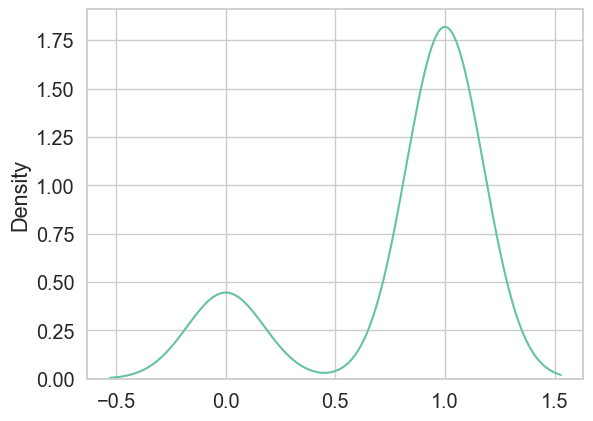

In [16]:
# построим гистограмму, чтобы была
sns.kdeplot(guess_f)

In [17]:
estimation_f = np.mean(guess_f)
sigma_f = estimation_f*(1- estimation_f)
alpha = 0.95
#c = sps.bernoulli.ppf()
z = sps.norm.ppf(1-alpha/2)
conf_int_f = round(estimation_f - z*(sigma_f/len(guess_f))**0.5, 4), round(estimation_f + z*(sigma_f/len(guess_f))**0.5, 4)
conf_int_f

(0.8001, 0.8065)

**Выводы:**

Как видно, доверительный интервал сместился в сторону 1. То есть истинное значение тоже сместилось в правую сторону.

Получается, что увеличилось количество верных предсказаний. Отсюда можно сделать вывод, что "лес" предсказывает лучше, чем 1 "дерево".

## <b><font color="orange">Сложная часть</font></b>
## Задача 3
### 1. Загрузка данных


### *Профиль биология*

[Данные](https://archive.ics.uci.edu/dataset/1/abalone). Будем предсказывать возраст моллюсков.

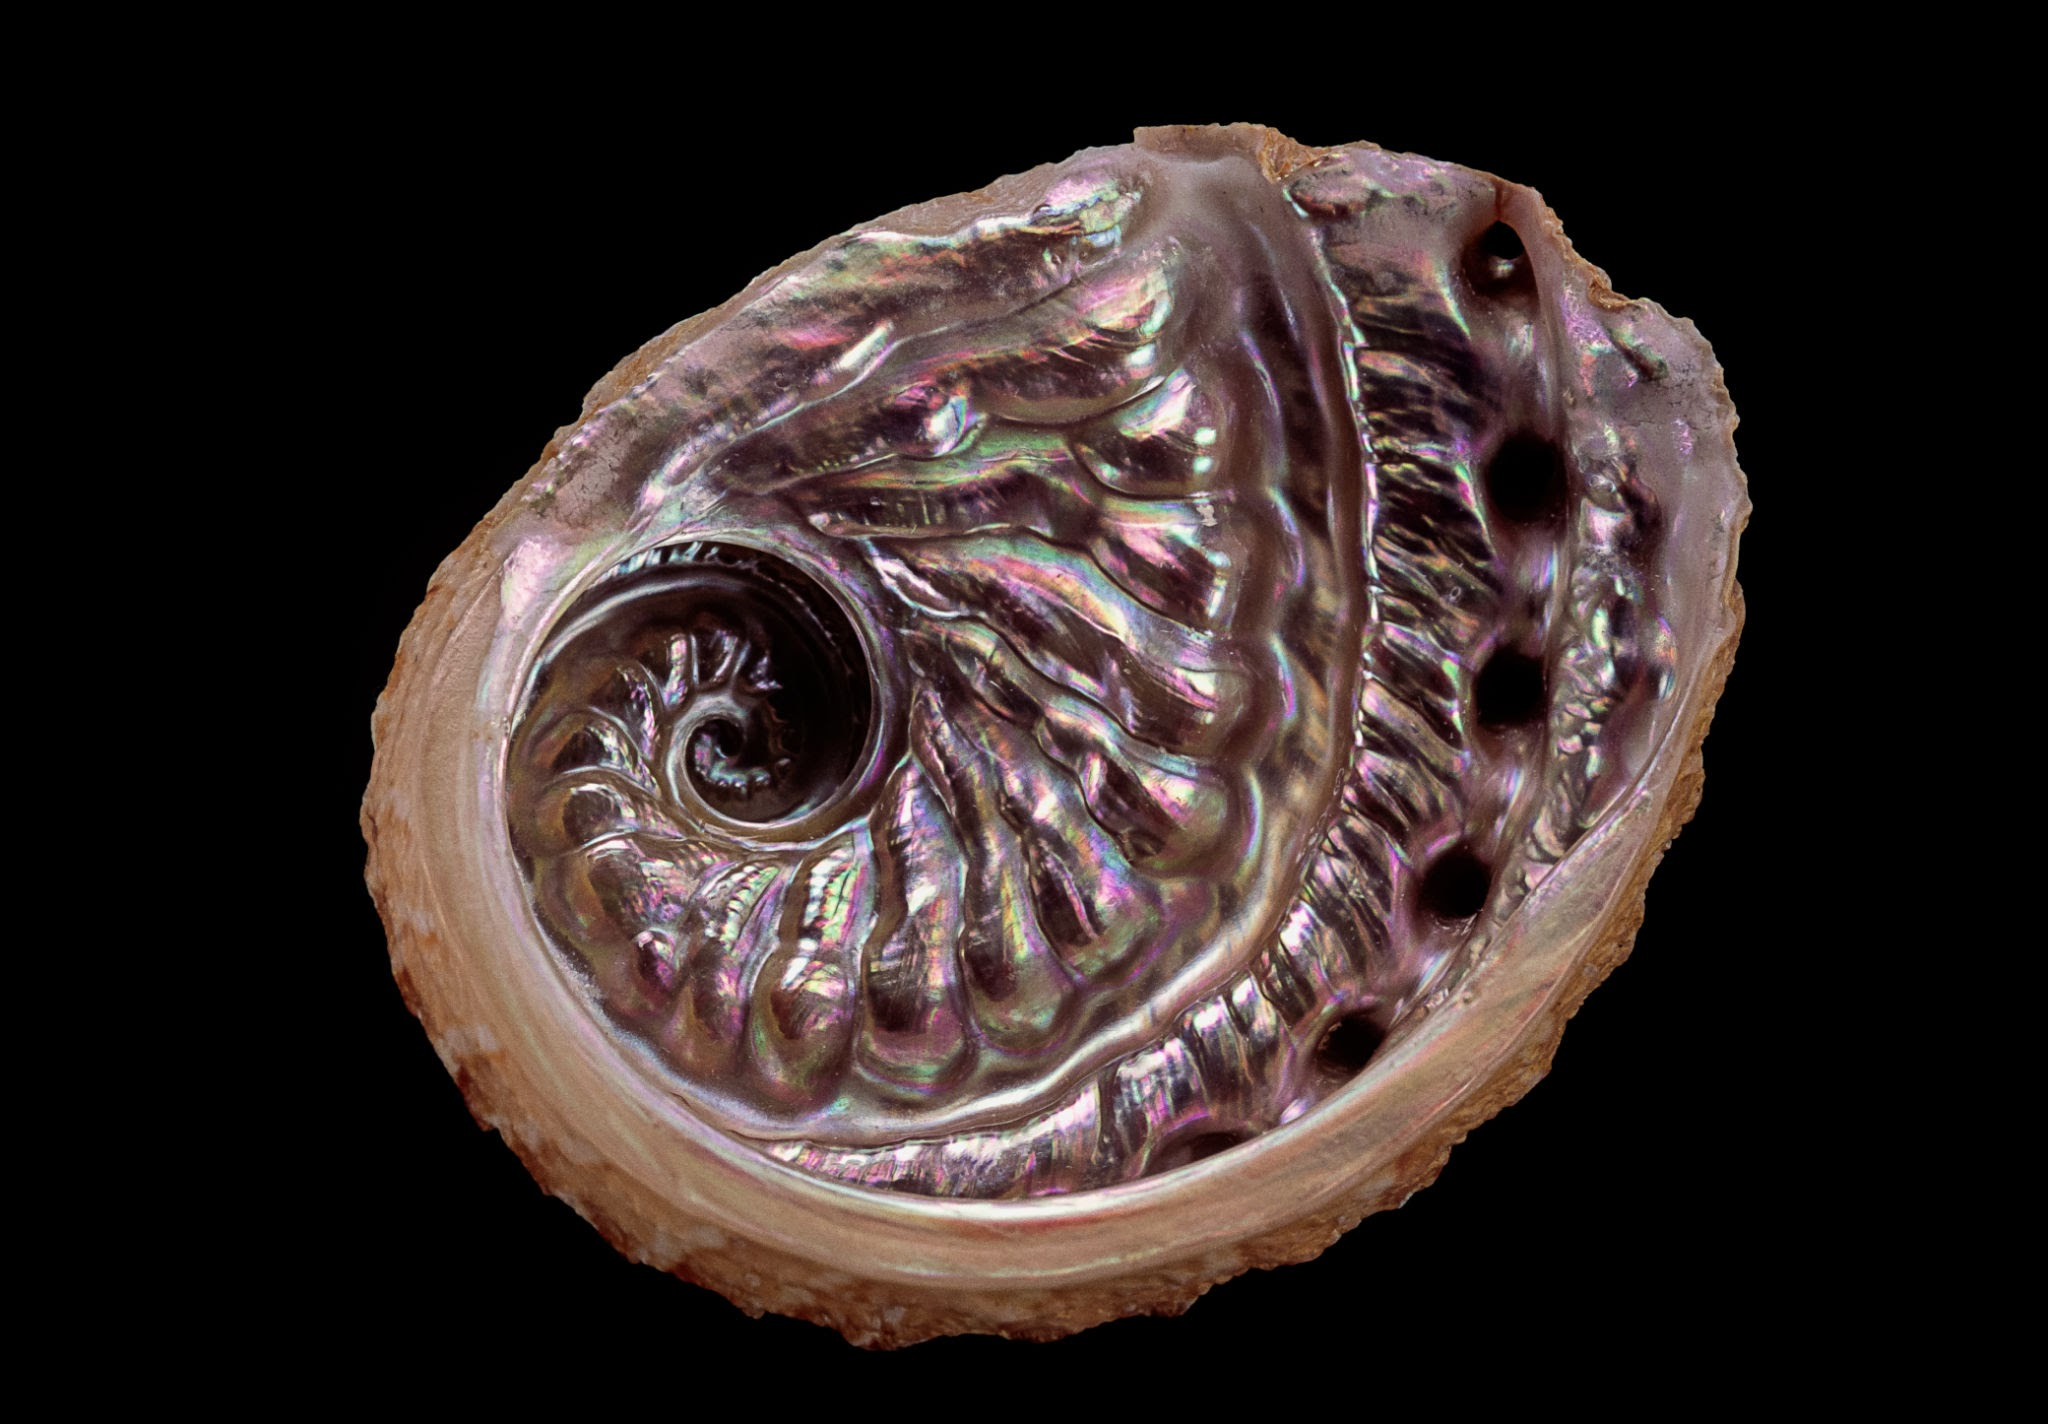

In [18]:
data = pd.read_csv('C:/Users/админ/Desktop/МатСтаты/датасеты/abalone.data', names=['Sex', 'Length', 'Diameter', 'Height', 'Whole weight',
                                          'Shucked weight', 'Viscera weight', 'Shell weight',
                                          'Rings'])

In [19]:
data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [20]:
data = data.drop('Sex', axis=1)
X = data.drop('Rings', axis=1)
y = data['Rings'] + 1.5

In [21]:
X_1, X_test, y_1, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_1, y_1, test_size = 0.2, random_state=42)

### 2. Обучение модели

Обучите решающее дерево глубины 3 и визуализируйте его.

*Рекомендуется сделать скриншот визуализации и прислать его в бот вместе с ноутбуком.*

In [22]:
tree = DecisionTreeRegressor(max_depth = 3)
tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

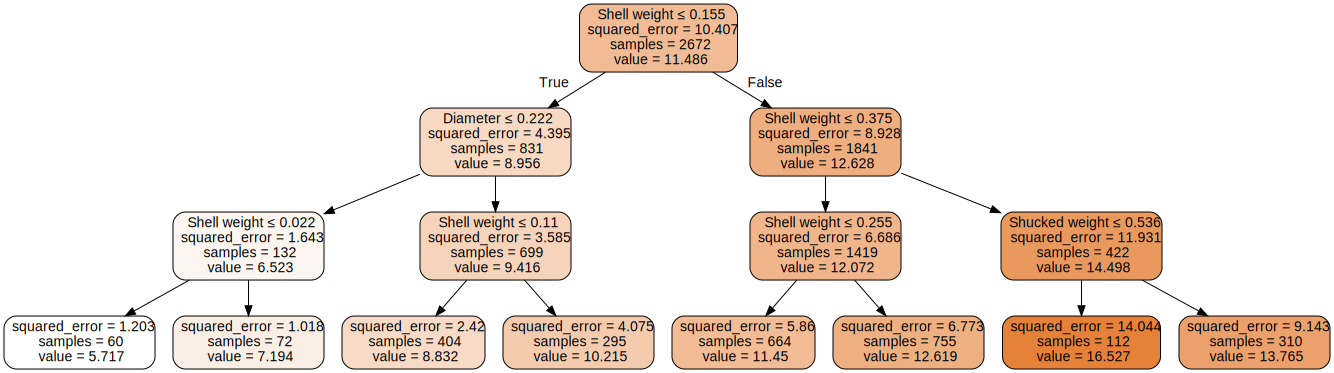

In [23]:
dot_data = export_graphviz(
        tree, out_file=None, 
        feature_names=X.columns, 
        filled=True, rounded=True, special_characters=True
    )  
graphviz.Source(dot_data) 

Посчитайте выбранную метрику на валидационной выборке.

In [24]:
y_pred_val = tree.predict(X_valid)
print(round(mean_absolute_error(y_valid, y_pred_val), 4))
print(mean_absolute_percentage_error(y_valid, y_pred_val))

1.7827
0.1552637500014212


Подберите оптимальное значение максимальной глубины дерева. Для этого обучите решающие деревья с выставленным значением соответствующего гиперпараметра и посчитайте ошибку предсказаний каждого из них на валидационной выборке. Постройте соответствующий график - зависиость ошибки от максимальной глубины дерева. Подробнее про гиперпараметры смотрите в [документации](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html).

In [25]:
depth = np.linspace(1, 300, 300)

In [26]:
errors = []
for i in range(300):
    model = DecisionTreeRegressor(max_depth= int(depth[i]))
    model.fit(X_train, y_train)
    predictions = model.predict(X_valid)
    errors.append(round(mean_absolute_error(y_valid, predictions), 4))

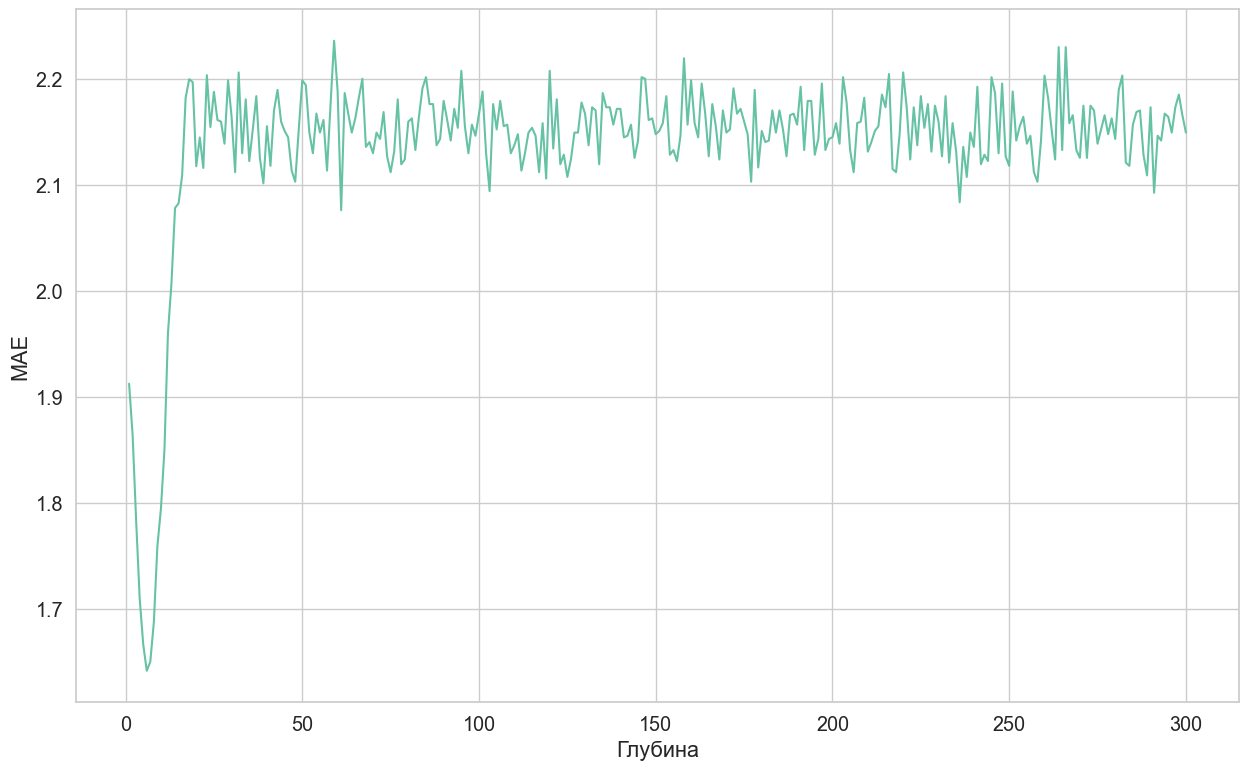

In [27]:
plt.figure(figsize=(15, 9))
plt.plot(depth, errors)
plt.ylabel('MAE')
plt.xlabel('Глубина')
plt.show()

In [28]:
print('Наименьшая ошибка при глубине:', int(depth[errors.index(min(errors))]))

Наименьшая ошибка при глубине: 6


Аналогичным образом подберите минимальное число объектов, необходимое для того, чтобы узел дерева мог бы расщепиться, зафиксировав при этом подобранное значение максимальной глубины. Для минимального числа объектов в листе и максимального число признаков, по которым ищется лучшее разбиение в дереве, подберите аналогично, фиксируя лучшие значения гиперпараметров, подобранные на предыдущем шаге.

In [29]:
splits = np.linspace(2, 300, 299)
errors = []
for i in range(299):
    model = DecisionTreeRegressor(max_depth= 6, min_samples_split= int(splits[i]))
    model.fit(X_train, y_train)
    predictions = model.predict(X_valid)
    errors.append(round(mean_absolute_error(y_valid, predictions), 4))

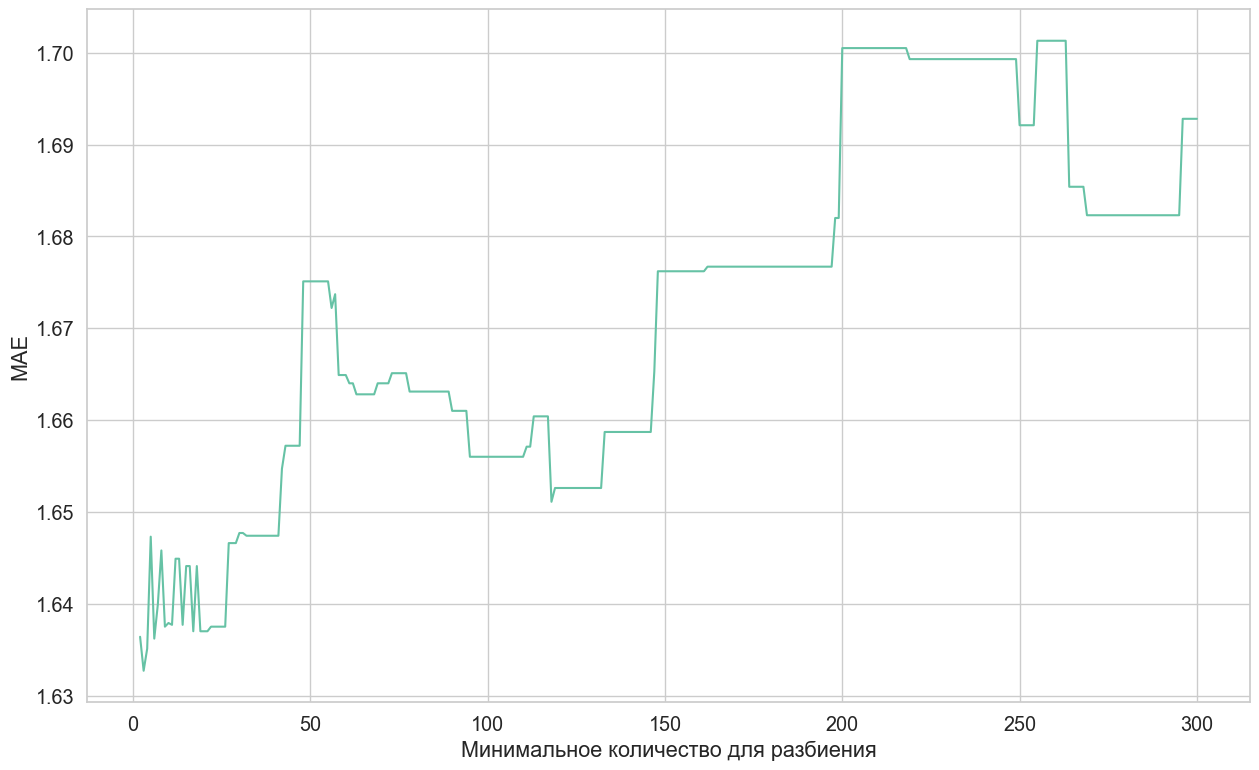

In [30]:
plt.figure(figsize=(15, 9))
plt.plot(splits, errors)
plt.ylabel('MAE')
plt.xlabel('Минимальное количество для разбиения')
plt.show()

In [31]:
print('Наименьшая ошибка при min_samples_split:', int(splits[errors.index(min(errors))]))

Наименьшая ошибка при min_samples_split: 3


In [32]:
leafs = np.linspace(1, 300, 300)
errors = []
for i in range(300):
    model = DecisionTreeRegressor(max_depth= 6, min_samples_split= 7, min_samples_leaf=int(leafs[i]))
    model.fit(X_train, y_train)
    predictions = model.predict(X_valid)
    errors.append(round(mean_absolute_error(y_valid, predictions), 4))

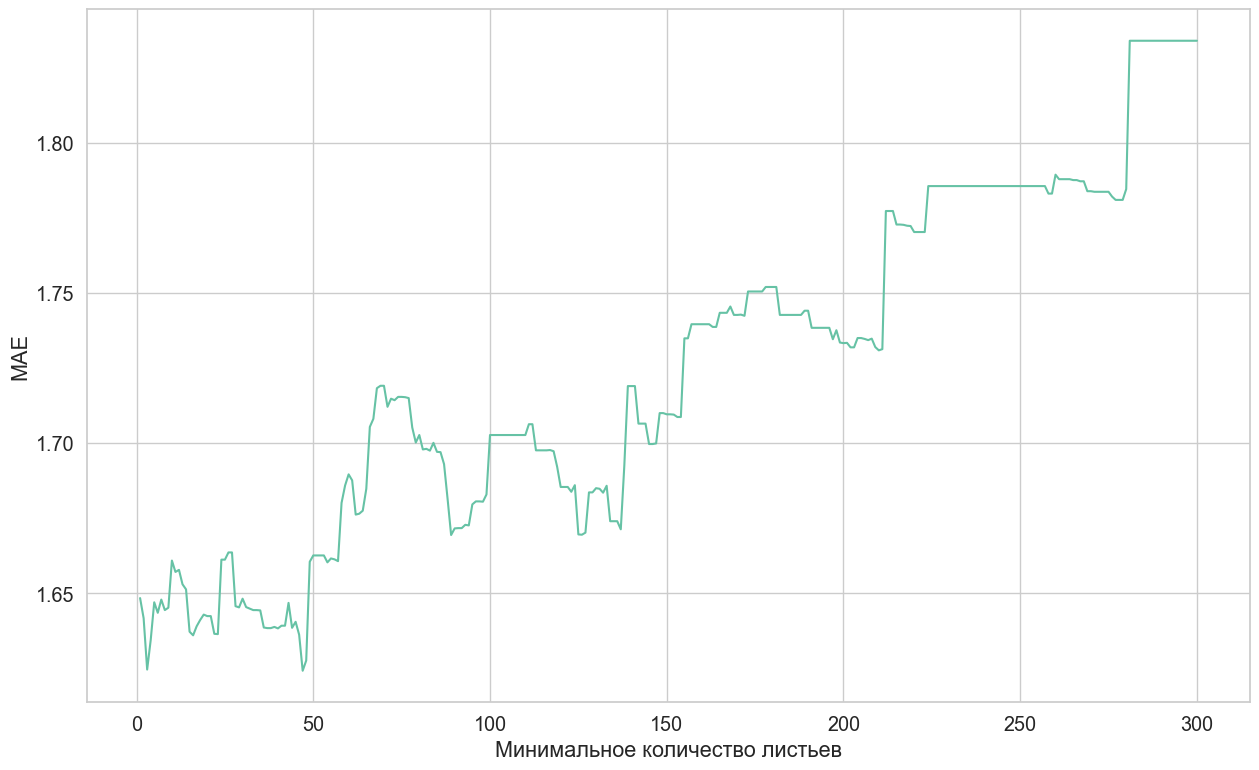

In [33]:
plt.figure(figsize=(15, 9))
plt.plot(leafs, errors)
plt.ylabel('MAE')
plt.xlabel('Минимальное количество листьев')
plt.show()

In [34]:
print('Наименьшая ошибка при min_samples_leaf:', int(leafs[errors.index(min(errors))]))

Наименьшая ошибка при min_samples_leaf: 47


In [35]:
features = np.linspace(1, 300, 300)
errors = []
for i in range(300):
    model = DecisionTreeRegressor(max_depth= 6, min_samples_split= 7, min_samples_leaf=47, max_features=int(features[i]))
    model.fit(X_train, y_train)
    predictions = model.predict(X_valid)
    errors.append(round(mean_absolute_error(y_valid, predictions), 4))

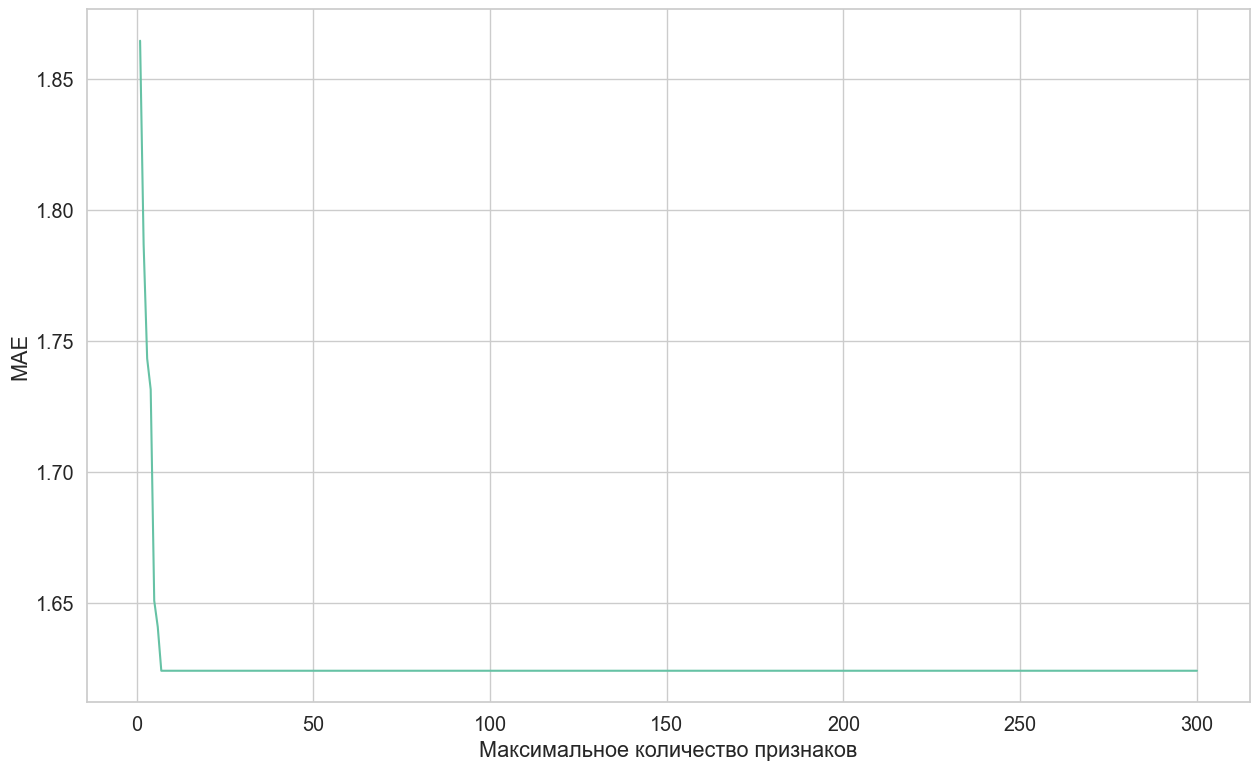

In [36]:
plt.figure(figsize=(15, 9))
plt.plot(features, errors)
plt.ylabel('MAE')
plt.xlabel('Максимальное количество признаков')
plt.show()

In [37]:
print('Наименьшая ошибка при max_features:', int(features[errors.index(min(errors))]))

Наименьшая ошибка при max_features: 7


Обучите вашу лучшую модель и сделайте предсказание для тестовой выборки.

In [38]:
best_model = DecisionTreeRegressor(criterion= 'absolute_error', min_samples_split= 7, max_depth= 6, min_samples_leaf=47, max_features= 7)
best_model.fit(X_train, y_train)
y_pred_my = best_model.predict(X_test)

Теперь вам предлагается проверить результат своей реализации с уже существующей функцией для оптимизации гиперпараметров - `GridSearchCV`. Эта функция помогает перебирать предопределенные гиперпараметры и подгонять вашу модель к тренировочному набору. Сравните полученные гиперпараметры и если они различаются, объясните почему. Для этого вам может понадобится [документация](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [124]:
params = {
    'max_depth': range(4, 8),
    'min_samples_split': range(1, 10),
    'min_samples_leaf': range(40, 50),
    'max_features': range(5, 10)

}
modelCV = GridSearchCV(estimator= DecisionTreeRegressor(criterion='absolute_error'), param_grid=params)
modelCV.fit(X_train, y_train)

print('Лучшие параметры', modelCV.best_params_)

Лучшие параметры {'max_depth': 7, 'max_features': 6, 'min_samples_leaf': 45, 'min_samples_split': 4}


c:\Anaconda\envs\laba\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
1000 fits failed out of a total of 9000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1000 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Anaconda\envs\laba\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Anaconda\envs\laba\Lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "c:\Anaconda\envs\laba\Lib\site-packages\sklearn\tree\_classes.py", line 177, in fit
    self._validate_params()
  File "c:\Anaconda\envs\laba\Lib\site-packages\sklearn\base.py", line 600, in _

**Ответ:**
Гиперпараметры отличаются по той причине, что в моей моделе я фиксировал значение всех параметров, кроме одной. Её я и варьировал, находя лучшее значение МАЕ.

GridSearchCV варьирует ВСЕ гиперпараметры, ища наименьшее значение МАЕ. Таким образом, она переставляет все значения, выбирая минимальную ошибку.

По этой причине гиперпараметры отличаются(хотя не слишком сильно).

Посчитатайте метрику на тестовой выборке и взуализируйте деревья при оптимальных гиперпараметрахдля двух оптимальных моделей - вашей и GridSearchCV.

**Ваша модель**

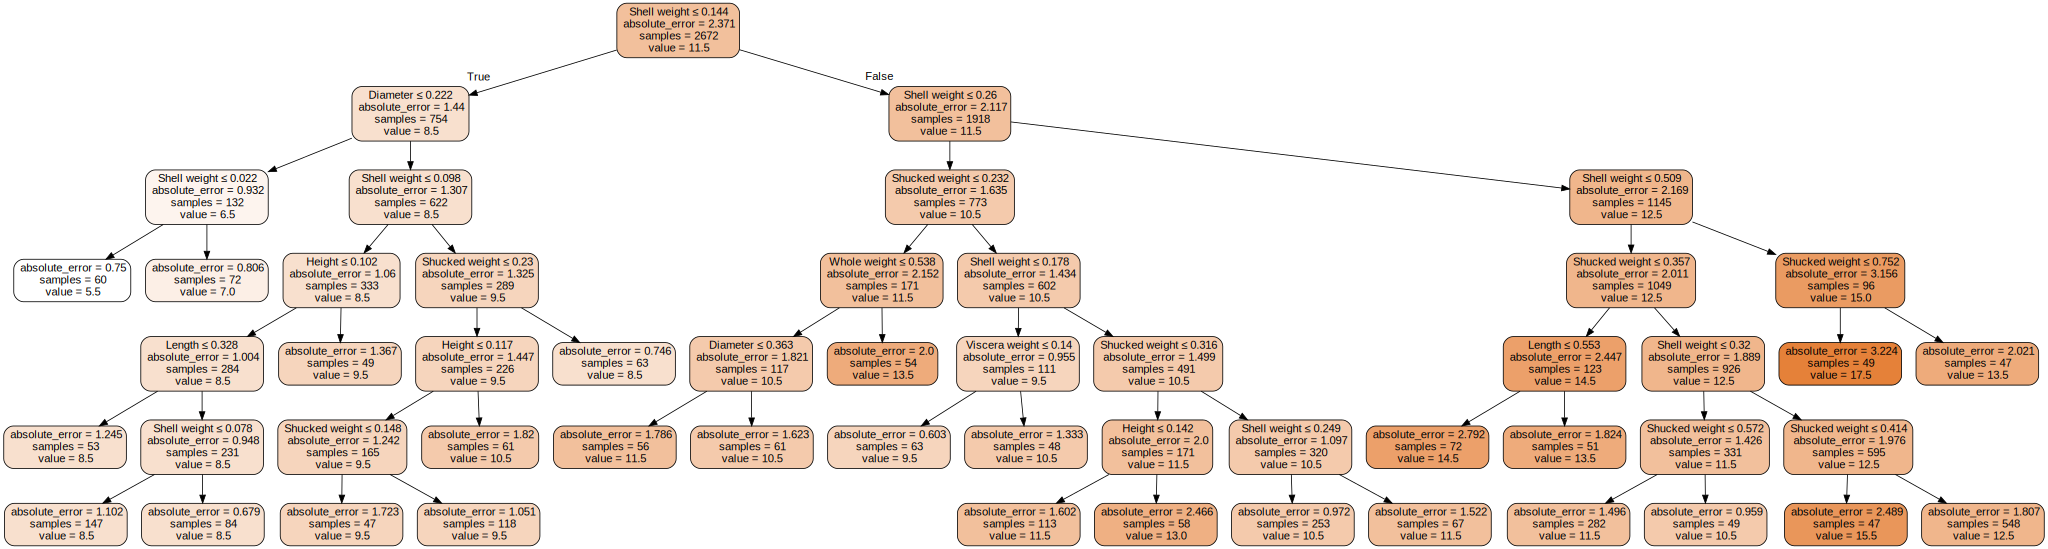

In [41]:
dot_data = export_graphviz(
        best_model, out_file=None, 
        feature_names=X.columns, 
        filled=True, rounded=True, special_characters=True
    )  
graphviz.Source(dot_data) 

In [126]:
print('MAE:', mean_absolute_error(y_test, y_pred_my))

MAE: 1.6076555023923444


**Лучшая модель по мнению GridSearchCV**

In [39]:
modelCV = DecisionTreeRegressor(criterion='absolute_error', max_depth= 7, max_features= 6, min_samples_leaf=45, min_samples_split=4)
modelCV.fit(X_train, y_train)
y_pred_CV = modelCV.predict(X_test)

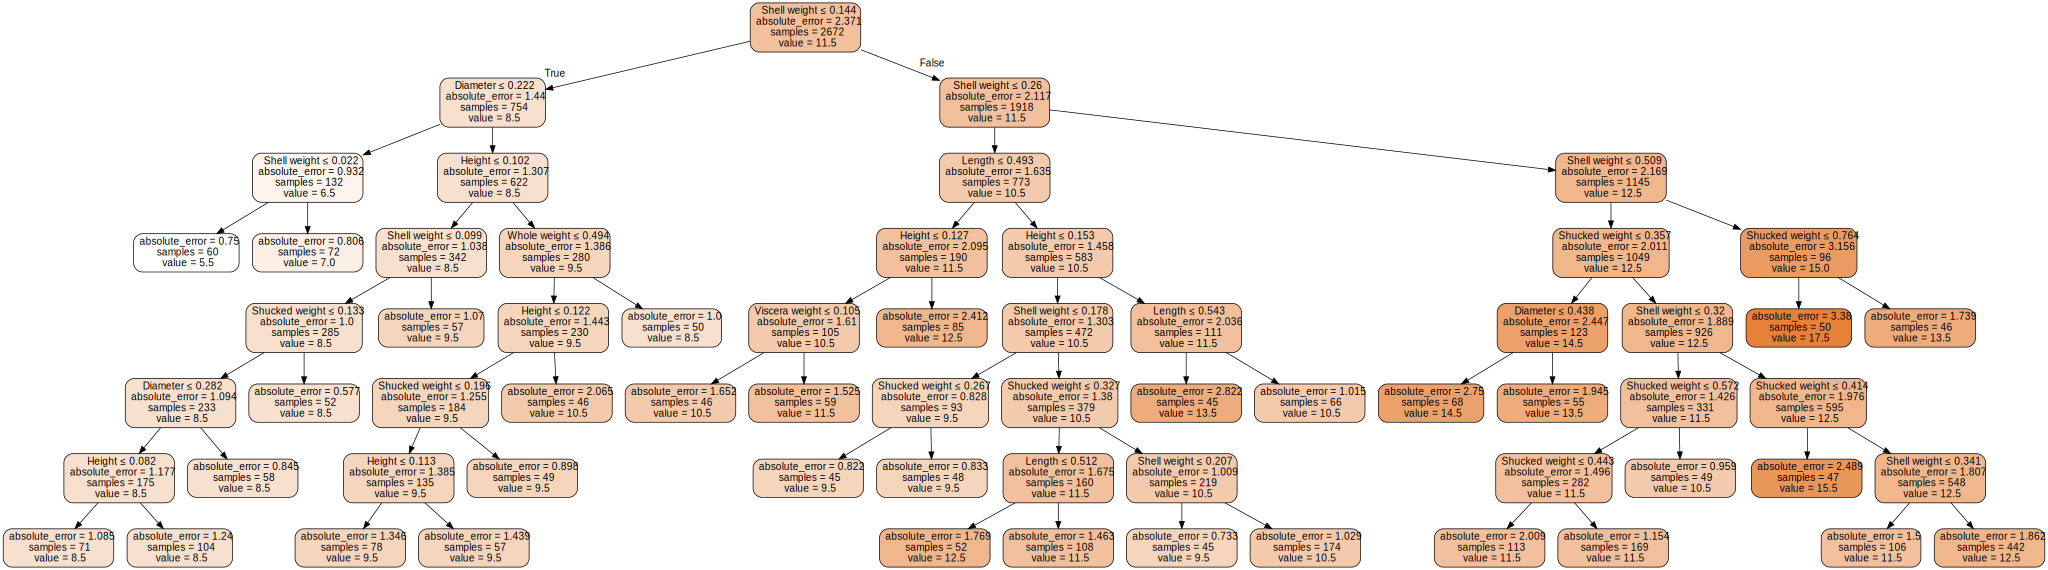

In [40]:
dot_data = export_graphviz(
        modelCV, out_file=None, 
        feature_names=X.columns, 
        filled=True, rounded=True, special_characters=True
    )  
graphviz.Source(dot_data) 

In [128]:
print('MAE:', mean_absolute_error(y_test, y_pred_CV))

MAE: 1.5867224880382775


Решающее дерево позволяет оценить *важность признаков* &mdash; некоторая величина, зависящая от того
* насколько часто тот или иной признак использовался при разбиении листа,
* и насколько сильно при этом изменился критерий информативности.

У обученной модели значения важности признаков лежат в поле `feature_importances_`. Визуализируйте их на одном графике с помощью `seaborn.barplot` для обеих моделей.

In [42]:
print('Моя модель', best_model.feature_importances_)
print('Модель по версии GridSearchCV', modelCV.feature_importances_)

Моя модель [0.00302637 0.07090359 0.01297017 0.02031993 0.1154345  0.00172936
 0.77561608]
Модель по версии GridSearchCV [0.02875817 0.06840959 0.04749455 0.00261438 0.09586057 0.00130719
 0.75555556]


In [43]:
bar1 = pd.DataFrame({'Важность':best_model.feature_importances_, 'Features': ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight']})

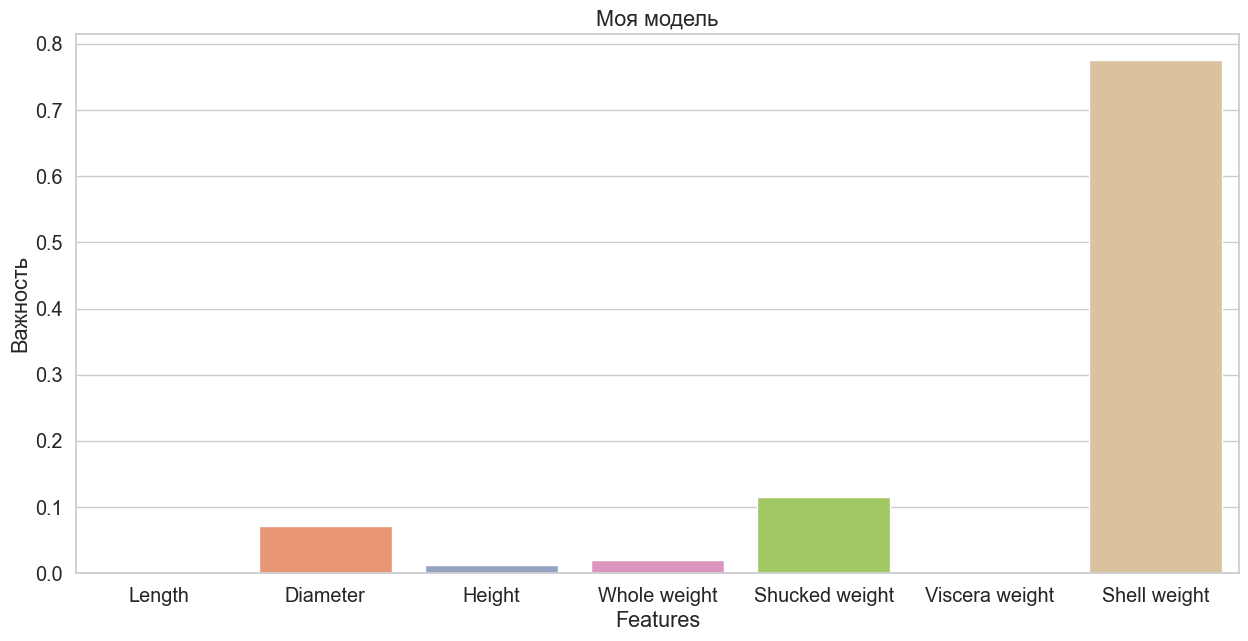

In [44]:
plt.figure(figsize=(15,7))
sns.barplot(data = bar1, x = 'Features', y ='Важность')
plt.title('Моя модель')
plt.show()

In [45]:
bar2 = pd.DataFrame({'Важность':modelCV.feature_importances_, 'Features': ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight']})

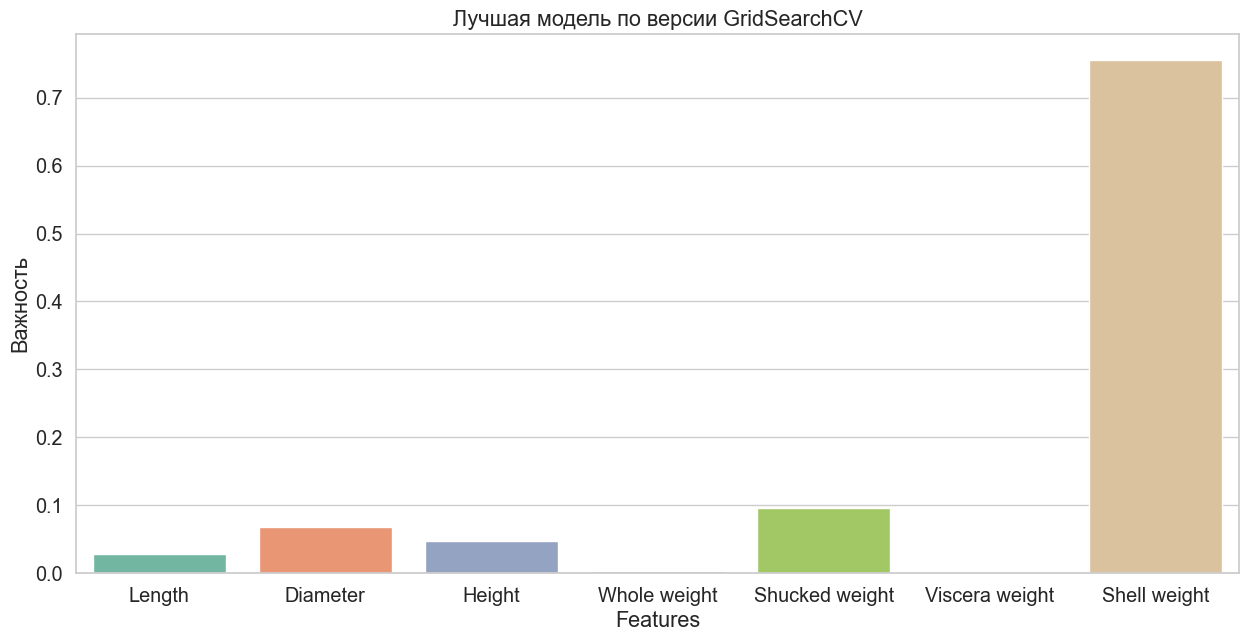

In [46]:
plt.figure(figsize=(15,7))
sns.barplot(data = bar2, x = 'Features', y ='Важность')
plt.title('Лучшая модель по версии GridSearchCV')
plt.show()

Сделайте выводы. Объясните, согласуется ли логически, почему вес того или иного параметра так влияет на целевую переменную.

**Вывод:**

GridSearchCV выбирает такие гиперпараметры, что бы его ошибка минимальна. Ошибка уменьшается, если задействовано как можно больше признаков(то есть ориентируемся не по одному признаку, а по нескольким). В этом случае важность признаков распределена более равномерна(хотя всё ещё наиболее важный признак - Вес ракушки).

В случае моей модели я отобрал просто лучшие значения признаков, при котором MAE минимально. То есть параметры распределены не совсем равномерно(выделились несколько признаков).

От выбранных параметров зависит распределение по "важности" признаков, а они напрямую влияют на результат предсказания.

Для наглядного сравнения: 

MAE для модели GridSearchCV: 1.5867

МАЕ для моей модели: 1.6077

## Задача 4

Для данных из задачи 3 обучите случайный лес на 500 деревьев.

In [48]:
forest_500 = RandomForestRegressor(n_estimators = 500)
forest_500.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500)

Постройте график зависимости ошибки модели в зависимости от количества деревьев для обучающей и валидационной выборок.

*Замечание.* Не нужно заново обучать лес каждый раз. Используйте у *обученной* модели поле `estimators_`, это список из объектов класса `DecisionTreeRegressor`. Обратите внимание, что это приватное поле объекта, и менять его очень плохо, за такое баллы будут снижаться.

Посчитайте метрику на тестовой выборке.

In [ ]:
errors_valid = []
errors_train = []
for i in range(1, 500):
    predictions_valid = np.mean([tree.predict(X_valid) for tree in forest_500.estimators_[:i]], axis = 0)
    errors_valid.append(mean_absolute_error(y_valid, predictions_valid))

    predictions_train = np.mean([tree.predict(X_train) for tree in forest_500.estimators_[:i]], axis = 0)
    errors_train.append(mean_absolute_error(y_train, predictions_train))

**Я очистил выходные данные из кода выше, т.к. они занимали много памяти(около 50 МБ).**

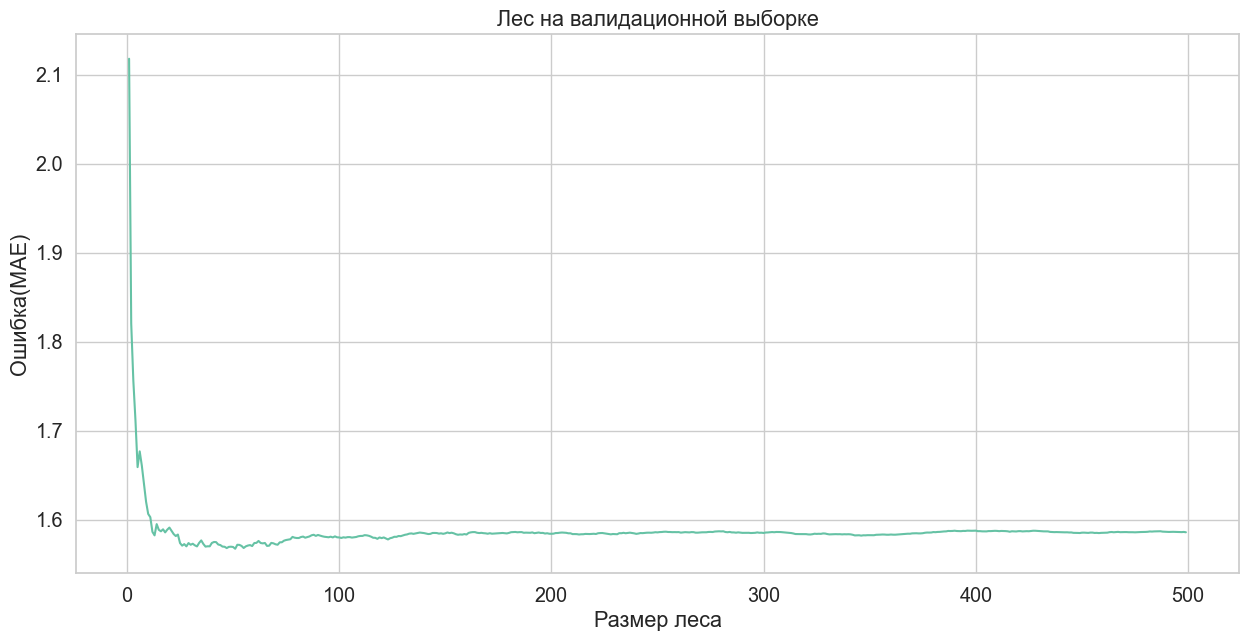

Лучшее значение при размере: 51


In [74]:
plt.figure(figsize= (15,7))
plt.plot(np.arange(1, 500), errors_valid)
plt.xlabel('Размер леса')
plt.ylabel('Ошибка(MAE)')
plt.title('Лес на валидационной выборке')
plt.show()
print('Лучшее значение при размере:', int(np.arange(1,500)[errors_valid.index(min(errors_valid))]))

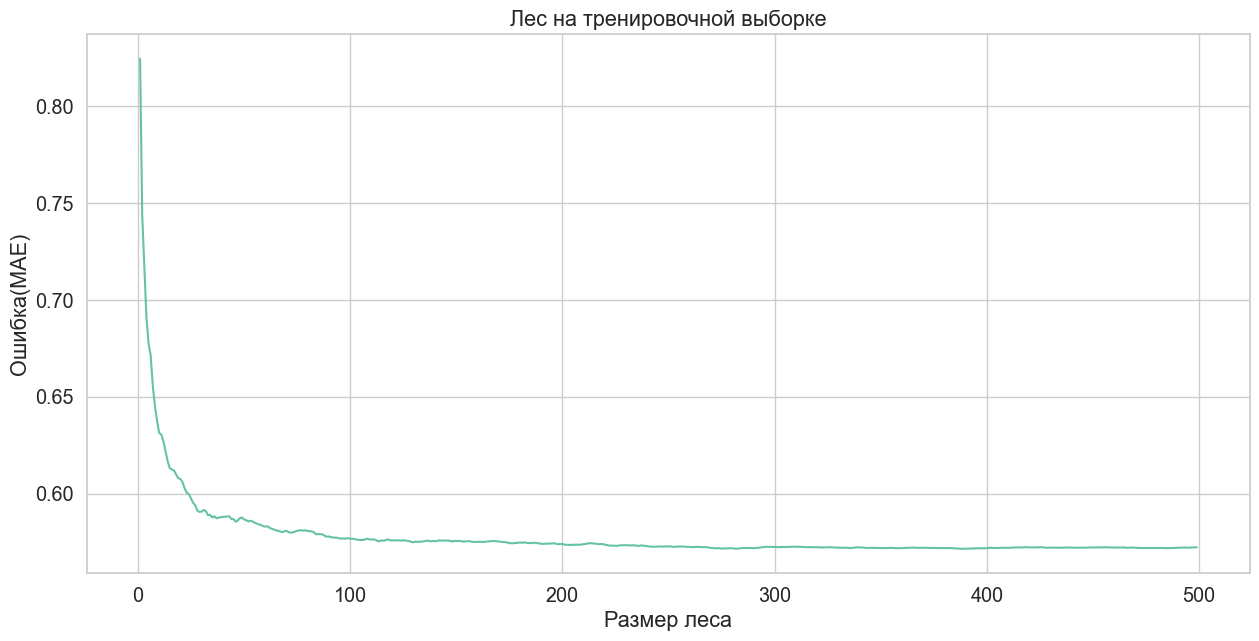

In [69]:
plt.figure(figsize= (15,7))
plt.plot(np.arange(1, 500), errors_train)
plt.xlabel('Размер леса')
plt.ylabel('Ошибка(MAE)')
plt.title('Лес на тренировочной выборке')
plt.show()

Для леса с максимальным количеством деревьев визуализируйте
важность признаков, используя поле `feature_importances_`.

In [70]:
bar3 = pd.DataFrame({'Важность':forest_500.feature_importances_, 'Features': ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight']})

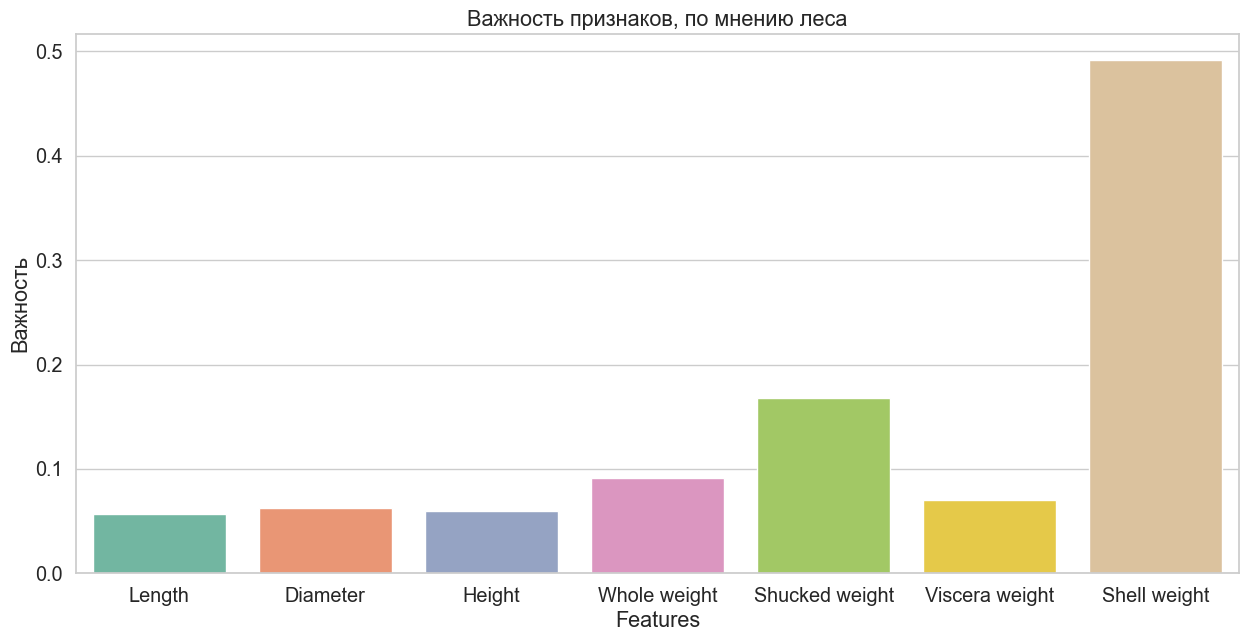

In [72]:
plt.figure(figsize=(15,7))
sns.barplot(data = bar3, x = 'Features', y ='Важность')
plt.title('Важность признаков, по мнению леса')
plt.show()

In [81]:
# посчитаем метрику на тестовой выборке
y_pred = np.mean([tree.predict(X_test) for tree in forest_500.estimators_[:52]], axis =0)
print('MAE леса:', round(mean_absolute_error(y_test, y_pred), 4))

MAE леса: 1.6323


c:\Anaconda\envs\laba\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
c:\Anaconda\envs\laba\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
c:\Anaconda\envs\laba\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
c:\Anaconda\envs\laba\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
c:\Anaconda\envs\laba\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
c:\Anaconda\envs\laba\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without featu

Сделайте выводы.

**Вывод:**

Теперь "важность" распределена максимально равномерно между всеми признаками, но при этом лес переобучился на тренировочной выборке, из-за чего его МАЕ увеличился по сравнению с одиночным деревом(результат из 3 задания). Получили, что MAE леса: 1.6323. 

Получается, если мы хотим учитывать больше признаков, то мы вынуждены увеличивать ошибку. Хотя возможно, что для леса можно так же искать наилучшие параметры, как я это делал в прошлой задаче. 

Также такой размер ошибка может быть связан с тем, что гиперпараметры определяются случайно, то есть выбираются не наилучшие из них. По ощущением, это стоит проверить отдельно, но мой комп считал 10 минут в 3 задании наилучшие параметры для 1 дерева. Для 500 деревьев потребуется 83 часа, что очень долго и затратно.